In [1]:
# a) Compute and display summary statistics for each feature available in the dataset. (e.g.
# minimum value, maximum value, mean, range, standard deviation, variance and
# percentiles
# b) Illustrate the feature distributions using histogram.
# c) Data cleaning, Data integration, Data transformation, Data model building (e.g.
# Classification)

In [2]:
!pip install numpy

In [3]:
!pip install pandas

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('Admission_Predict.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
summary_stats=df.describe(percentiles=[0.25,0.5,0.75]).T      #transpose to make features as rows
summary_stats['range']=summary_stats['max']-summary_stats['min']   #add range column
summary_stats['variance']=df.var()    #add variance column

In [8]:
print(summary_stats)

                   count        mean         std     min     25%     50%  \
Serial No.         400.0  200.500000  115.614301    1.00  100.75  200.50   
GRE Score          400.0  316.807500   11.473646  290.00  308.00  317.00   
TOEFL Score        400.0  107.410000    6.069514   92.00  103.00  107.00   
University Rating  400.0    3.087500    1.143728    1.00    2.00    3.00   
SOP                400.0    3.400000    1.006869    1.00    2.50    3.50   
LOR                400.0    3.452500    0.898478    1.00    3.00    3.50   
CGPA               400.0    8.598925    0.596317    6.80    8.17    8.61   
Research           400.0    0.547500    0.498362    0.00    0.00    1.00   
Chance of Admit    400.0    0.724350    0.142609    0.34    0.64    0.73   

                        75%     max   range      variance  
Serial No.         300.2500  400.00  399.00  13366.666667  
GRE Score          325.0000  340.00   50.00    131.644555  
TOEFL Score        112.0000  120.00   28.00     36.838997  

In [9]:
import matplotlib.pyplot as plt

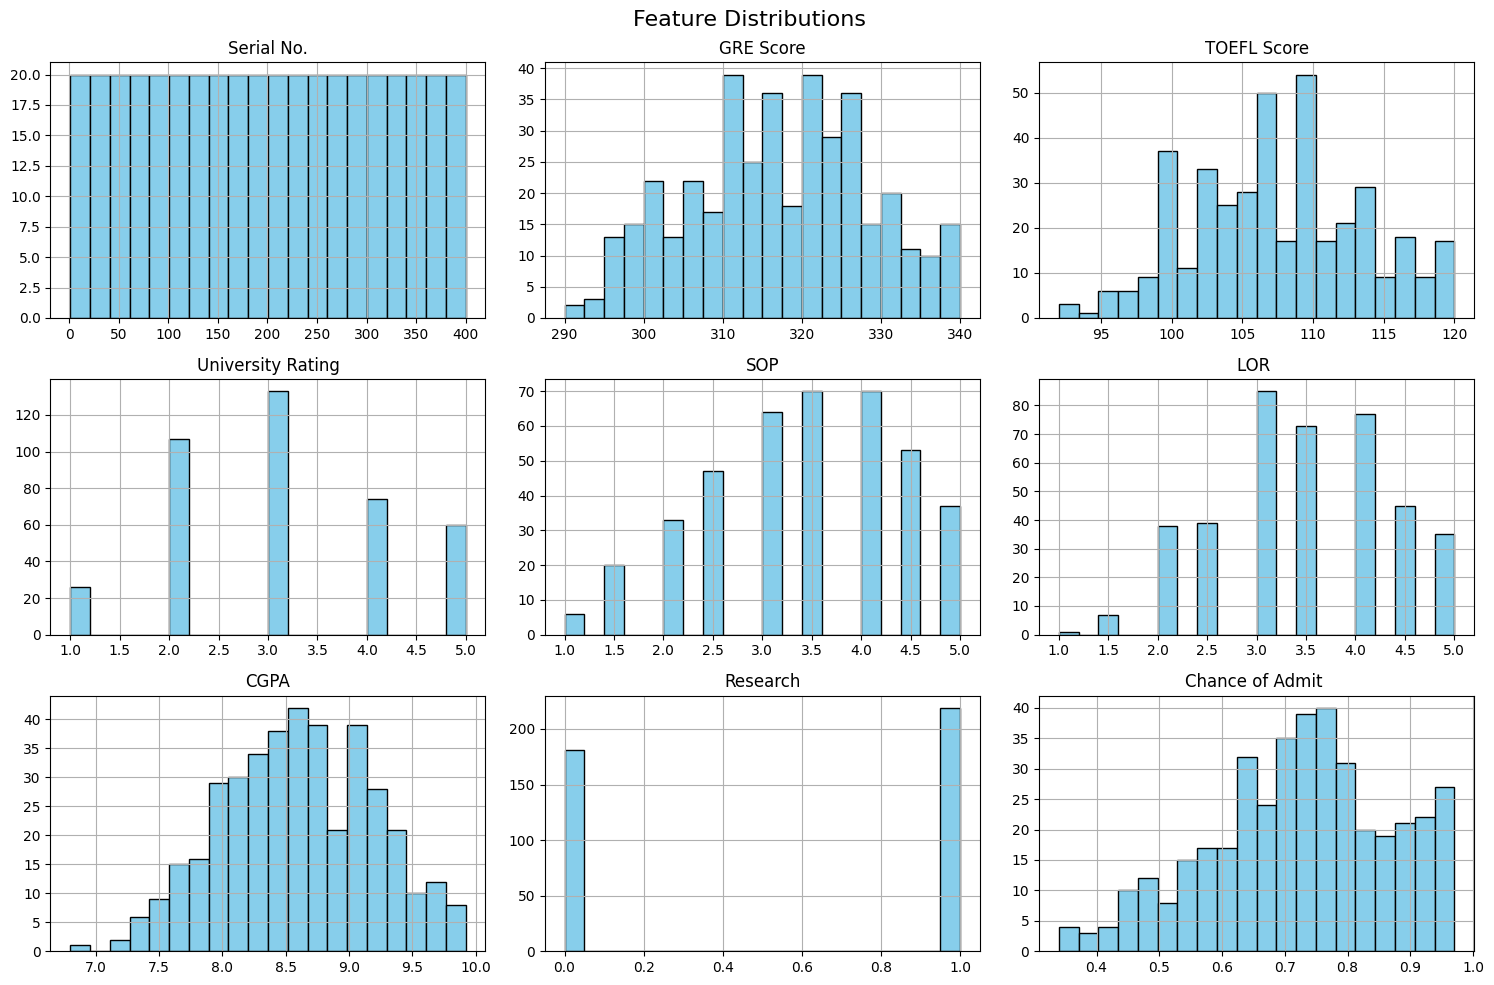

In [10]:
# Plot histograms for all numerical features
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)  # Add a title for all histograms
plt.tight_layout()
plt.show()

In [11]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [12]:
df.fillna(df.mean(),inplace=True)

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
# Convert 'Chance of Admit' into a binary classification target
df['Admit_Class'] = (df['Chance of Admit '] >= 0.75).astype(int)

In [16]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit_Class
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [18]:
# Define features & target
X = df.drop(columns=['Chance of Admit ', 'Admit_Class', 'Serial No.'])
y = df['Admit_Class']

In [20]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Data Transformation: Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Train Classification Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
# Compute Confusion Matrix and Performance Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [25]:
# Print Performance Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.86
Recall: 0.94
F1 Score: 0.90


In [27]:
import seaborn as sns


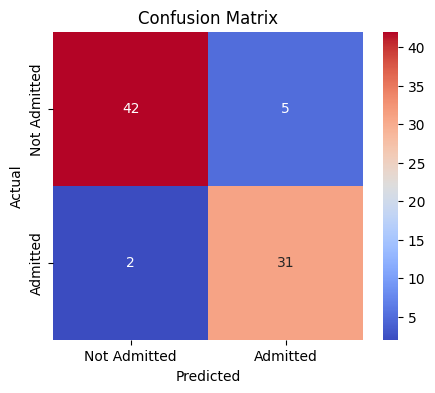

In [28]:
# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()